In [1]:
! pip install plotly-express

In [13]:
import plotly.express as px
import pandas as pd
import streamlit as st
import seaborn as sns

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


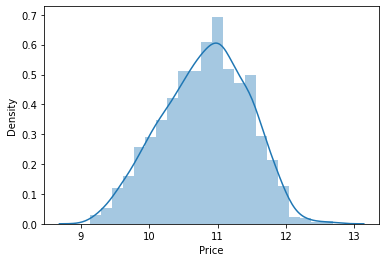

In [46]:
sns.distplot(np.log(df['Price']))
plt.show()

In [15]:
df=pd.read_csv("data.csv")
df.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu_brand,HDD,SSD,Gpu_brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [14]:
df.groupby(by=["Company"]).sum()[["Price"]].sort_values(by="Price")

,Price
Company,
Vero,4.633762e+04
Chuwi,5.023718e+04
Mediacom,1.100232e+05
Fujitsu,1.165234e+05
Huawei,1.517414e+05
Xiaomi,2.415635e+05
Google,2.681582e+05
LG,3.355042e+05
Microsoft,5.154227e+05


In [39]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [93]:
df.shape

(1302, 13)

###  convert csv to xlsx

In [31]:
excelwriter=pd.ExcelWriter("old.xlsx")

In [32]:
df.to_excel(excelwriter)

In [33]:
excelwriter.save()

###  _________web app deployment______________

In [9]:
! pip install pandas openpyxl

In [5]:
%%writefile dashboard.py

import plotly.express as px
import pandas as pd
import streamlit as st
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

st.set_page_config(page_title="sales dashboard ",
                   page_icon=":bar_chart:",
                   layout="wide"
)                 

df=pd.read_csv("data.csv")




# sns.distplot(np.log(df['Price']))
# plt.show()

# df=pd.read_excel(io='new.xlsx',
#     sheet_name='Sheet1',
#     engine='openpyxl',
#     skiprows=3,
#     usecols='A:N',
#     nrows=1302,
# )

# st.dataframe(df)

st.sidebar.header("please filter Here:")
company=st.sidebar.multiselect(
     "select the Company",
    options=df["Company"].unique(),
    default=df["Company"].unique()
)


typeName=st.sidebar.multiselect(
     "select the TypeName",
    options=df["TypeName"].unique(),
    default=df["TypeName"].unique()
)


ram=st.sidebar.multiselect(
     "select the Ram",
    options=df["Ram"].unique(),
    default=df["Ram"].unique()
)




df_selection =df.query(        
       "Company == @company & TypeName == @typeName & Ram == @ram"
)


# st.dataframe(df_selection)




st.title(":bar_chart:laptop prices dashboard ")
st.markdown("##")

total_sales = int(df_selection["Price"].sum())
average_Weight =round(df_selection["Weight"].mean(),1)
star_Weight = ":star:"* int(round(average_Weight, 0))
average_sale_by_transaction = round(df_selection["Price"].mean(),2)

left_column, middle_column ,right_column =st.columns(3)
with left_column:
    st.subheader("Totel sales:")
    st.subheader(f"US $ {total_sales:,}")     
with middle_column:
    st.subheader("Average Weight:")
    st.subheader(f"{average_Weight} {star_Weight}")
with right_column:
    st.subheader("Average Sales Per Transaction:")
    st.subheader(f"US $ {average_sale_by_transaction}") 
                        
st.markdown("---")





# this stap is drow Cpu_brand with price

sales_by_Cpu_brand_line= (
    df_selection.groupby(by=["Cpu_brand"]).sum()[["Price"]].sort_values(by="Price")


)


fig_cpu_brand_price=px.bar(
    
    sales_by_Cpu_brand_line,
    x="Price",
    y=sales_by_Cpu_brand_line.index,
    orientation="h",
    title="<B>prices by brand line</b>",
    color_discrete_sequence=["#0083B8"] * len(sales_by_Cpu_brand_line),
    template="plotly_white",

)
fig_cpu_brand_price.update_layout(
    plot_bgcolor="rgba(0,0,0,0)",
    xaxis=(dict(showgrid=False))


)


# st.plotly_chart(fig_cpu_brand_price)


# this stap is company with price

sales_company_line= (
    df_selection.groupby(by=["Company"]).sum()[["Price"]]


)


fig_company_price=px.bar(
    
    sales_company_line,
    x="Price",
    y=sales_company_line.index,
    orientation="h",
    title="<B>prices by company line</b>",
    color_discrete_sequence=["#0083B8"] * len(sales_company_line),
    template="plotly_white",

)
fig_company_price.update_layout(
    plot_bgcolor="rgba(0,0,0,0)",
    yaxis=(dict(showgrid=False))


)

left_column,right_column=st.columns(2)
left_column.plotly_chart(fig_company_price,use_container_width=True)
right_column.plotly_chart(fig_cpu_brand_price,use_container_width=True)


# hide_streamlit style

hide_st_style = """
         <style>
         #MainMenu {visibility: hidden,}
         foorter {visibility: hidden,}
         header {visibility: hidden,}
         </style>
         """
st.markdown(hide_st_style,unsafe_allow_html=True)




Overwriting dashboard.py


In [6]:
!streamlit run dashboard.py

^C


In [7]:
!heroku --version

heroku/7.60.2 win32-x64 node-v14.19.0


In [10]:
!pandas --version

'pandas' is not recognized as an internal or external command,
operable program or batch file.
